## 18_Model_XGBoost_Title_Features

Author: Daniel Hui

License: MIT

This notebook creates an XGBoost model using the book features, plus vectorized features from the book titles

In [2]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Global Variables
These names correspond to different data sets and targets. Comment them in/out to test different target ranges

In [3]:
target_range = "18_Half"

### Load Main Dataset

In [26]:
checkout_target_df = pd.read_csv(f'../01_Data/07_Merged_Target_Feature_Data/{target_range}_set.csv',index_col=0)

In [27]:
checkout_target_df.head(3)

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
0,3177276,0,1,0,2016,0,0,1,0,0,0,0,0,0,0,0,14,45,78,94,17,18,0,1,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1
1,395432,0,1,1,1985,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,123754,1,1,0,1945,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
checkout_target_df.describe()

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
count,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000
mean,2234258.6919,0.4945,0.9982,0.8704,1983.6751,0.2787,0.0825,0.6330,0.0375,0.0212,0.0386,0.1546,0.0472,0.0240,0.0191,0.0320,0.7237,2.3485,4.8724,9.6092,2.4991,2.8845,0.1122,0.0724,0.0847,0.0708,0.8960,0.0652,0.0327,0.0950,0.0347,0.0525,0.1073,0.0404,0.0234,0.1006,0.0491,0.0200,0.0331,0.1286,0.0692,0.0249,0.0464,0.0653,0.0317,0.1011,0.0575,0.0150,0.0691
std,953967.6490,0.5000,0.0423,0.3359,189.6728,0.4484,0.2751,0.4820,0.1899,0.1439,0.1927,0.3616,0.2121,0.1531,0.1368,0.1760,5.1280,12.2969,20.5221,34.4055,3.0947,4.7797,0.3156,0.2591,0.2785,0.2565,0.3053,0.2469,0.1778,0.2933,0.1830,0.2231,0.3095,0.1970,0.1510,0.3008,0.2161,0.1401,0.1789,0.3348,0.2537,0.1560,0.2104,0.2471,0.1752,0.3015,0.2327,0.1214,0.2537
min,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1848333.5000,0.0000,1.0000,1.0000,1996.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,2554562.0000,0.0000,1.0000,1.0000,2007.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,2957797.5000,1.0000,1.0000,1.0000,2013.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,3.0000,7.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,3343666.0000,1.0000,1.0000,1.0000,2022.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,585.0000,1436.0000,1613.0000,2621.0000,27.0000,290.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [29]:
checkout_target_df = checkout_target_df[["BibNum","Checkout","Title","ISBN","Year","Fiction",
                                         "Language","Nonfiction","Biography","Large Print","Picture",
                                         "Children","Teen","Mystery","AfAm","Comic"]]

In [30]:
checkout_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397147 entries, 0 to 397146
Data columns (total 16 columns):
BibNum         397147 non-null int64
Checkout       397147 non-null int64
Title          397147 non-null int64
ISBN           397147 non-null int64
Year           397147 non-null int64
Fiction        397147 non-null int64
Language       397147 non-null int64
Nonfiction     397147 non-null int64
Biography      397147 non-null int64
Large Print    397147 non-null int64
Picture        397147 non-null int64
Children       397147 non-null int64
Teen           397147 non-null int64
Mystery        397147 non-null int64
AfAm           397147 non-null int64
Comic          397147 non-null int64
dtypes: int64(16)
memory usage: 51.5 MB


In [31]:
len(checkout_target_df)

397147

### Load Book Title Vector Dataset

In [32]:
titles_df = pd.read_csv('../01_Data/06_Features/Book_Title_Vectors.csv',index_col=0)
titles_df = titles_df.drop(["Title"],axis=1)

In [33]:
titles_df.head()

,BibNum,10,100,act,adventures,affairs,african,age,agreement,april,art,best,big,biography,black,business,century,change,child,children,china,christmas,city,civil,collection,complete,country,culture,day,days,de,dead,death,design,earth,easy,education,el,energy,english,essays,family,fire,food,foreign,free,future,garden,girl,god,good,great,handbook,health,heart,home,human,ii,indian,inside,international,john,journey,july,june,kids,king,know,la,land,last,letters,little,living,lost,love,make,making,man,management,manual,march,may,memoir,men,modern,murder,music,mystery,national,natural,night,north,old,pacific,people,poems,poetry,politics,power,projects,public,recipes,relations,report,representatives,resources,revolution,rights,river,roman,school,science,sea,second,secret,secrets,security,selected,senate,september,short,signed,small,state,step,stories,study,subcommittee,tales,techniques,three,time,times,true,two,vol,volume,war,washington,water,way,west,western,white,wild,woman,women,work,year,years
0,3177276,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6701,0.0000,0.0000,0.7423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,395432,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,123754,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5734,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6393,0.0000,0.0000,0.0000,

In [34]:
titles_df = titles_df.fillna(0)    #there are a ton of null values from the merge. fill with 0
titles_df.describe()

,BibNum,10,100,act,adventures,affairs,african,age,agreement,april,art,best,big,biography,black,business,century,change,child,children,china,christmas,city,civil,collection,complete,country,culture,day,days,de,dead,death,design,earth,easy,education,el,energy,english,essays,family,fire,food,foreign,free,future,garden,girl,god,good,great,handbook,health,heart,home,human,ii,indian,inside,international,john,journey,july,june,kids,king,know,la,land,last,letters,little,living,lost,love,make,making,man,management,manual,march,may,memoir,men,modern,murder,music,mystery,national,natural,night,north,old,pacific,people,poems,poetry,politics,power,projects,public,recipes,relations,report,representatives,resources,revolution,rights,river,roman,school,science,sea,second,secret,secrets,security,selected,senate,september,short,signed,small,state,step,stories,study,subcommittee,tales,techniques,three,time,times,true,two,vol,volume,war,washington,water,way,west,western,white,wild,woman,women,work,year,years
count,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000
mean,2234258.6919,0.0014,0.0015,0.0013,0.0019,0.0013,0.0016,0.0024,0.0011,0.0009,0.0069,0.0031,0.0027,0.0020,0.0036,0.0020,0.0030,0.0015,0.0016,0.0025,0.0013,0.0025,0.0026,0.0013,0.0017,0.0031,0.0015,0.0016,0.0033,0.0015,0.0055,0.0017,0.0030,0.0021,0.0016,0.0015,0.0013,0.0021,0.0014,0.0018,0.0018,0.0030,0.0016,0.0020,0.0011,0.0014,0.0017,0.0016,0.0023,0.0020,0.0022,0.0042,0.0020,0.0019,0.0022,0.0038,0.0016,0.0014,0.0015,0.0016,0.0012,0.0017,0.0026,0.0009,0.0010,0.0017,0.0017,0.0020,0.0028,0.0016,0.0027,0.0015,0.0030,0.0021,0.0022,0.0056,0.0020,0.0025,0.0042,0.0010,0.0019,0.0011,0.0012,0.0030,0.0019,0.0033,0.0017,0.0024,0.0027,0.0031,0.0016,0.0022,0.0018,0.0016,0.0015,0.0027,0.0055,0.0016,0.0014,0.0026,0.0018,0.0014,0.0033,0.0009,0.0016,0.0021,0.0010,0.0017,0.0011,0.0017,0.0022,0.0018,0.0030,0.0017,0.0028,0.0026,0.0017,0.0010,0.0019,0.0020,0.0009,0.0015,0.0011,0.0015,0.0014,0.0012,0.0057,0.0016,0.0020,0.0025,0.0015,0.0022,0.0035,0.0015,0.0026,0.0025,0.0027,0.0042,0.0057,0.0028,0.0022,0.0026,0.0018,0.0014,0.0019,0.0017,0.0018,0.0036,0.0019,0.0023,0.0026
std,953967.6490,0.0335,0.0336,0.0288,0.0400,0.0243,0.0368,0.0452,0.0264,0.0223,0.0765,0.0508,0.0484,0.0430,0.0

### Merge! 

In [35]:
checkout_target_df = checkout_target_df.merge(titles_df,on="BibNum",how="left")
checkout_target_df.head()

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,10,100,act,adventures,affairs,african,age,agreement,april,art,best,big,biography,black,business,century,change,child,children,china,christmas,city,civil,collection,complete,country,culture,day,days,de,dead,death,design,earth,easy,education,el,energy,english,essays,family,fire,food,foreign,free,future,garden,girl,god,good,great,handbook,health,heart,home,human,ii,indian,inside,international,john,journey,july,june,kids,king,know,la,land,last,letters,little,living,lost,love,make,making,man,management,manual,march,may,memoir,men,modern,murder,music,mystery,national,natural,night,north,old,pacific,people,poems,poetry,politics,power,projects,public,recipes,relations,report,representatives,resources,revolution,rights,river,roman,school,science,sea,second,secret,secrets,security,selected,senate,september,short,signed,small,state,step,stories,study,subcommittee,tales,techniques,three,time,times,true,two,vol,volume,war,washington,water,way,west,western,white,wild,woman,women,work,year,years
0,3177276,0,1,0,2016,0,0,1,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6701,0.0000,0.0000,0.7423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,395432,0,1,1,1985,0,0,1,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,123754,1,1,0,1945,1,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5734,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.

### Train / Test / Split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [37]:
y = checkout_target_df["Checkout"]
X = checkout_target_df.drop(["Checkout","BibNum"],axis=1)

#hold out portion of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) #keep at 20 to be consistent

#hold out 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=50) 

In [38]:
print(len(X_train),len(X_val),len(X_test))

238287 79430 79430


In [39]:
X_train.head()

,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,10,100,act,adventures,affairs,african,age,agreement,april,art,best,big,biography,black,business,century,change,child,children,china,christmas,city,civil,collection,complete,country,culture,day,days,de,dead,death,design,earth,easy,education,el,energy,english,essays,family,fire,food,foreign,free,future,garden,girl,god,good,great,handbook,health,heart,home,human,ii,indian,inside,international,john,journey,july,june,kids,king,know,la,land,last,letters,little,living,lost,love,make,making,man,management,manual,march,may,memoir,men,modern,murder,music,mystery,national,natural,night,north,old,pacific,people,poems,poetry,politics,power,projects,public,recipes,relations,report,representatives,resources,revolution,rights,river,roman,school,science,sea,second,secret,secrets,security,selected,senate,september,short,signed,small,state,step,stories,study,subcommittee,tales,techniques,three,time,times,true,two,vol,volume,war,washington,water,way,west,western,white,wild,woman,women,work,year,years
86975,1,1,2017,0,1,0,0,0,0,0,0,0,0,0,0.0000,0.5569,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5015,0.0000,0.0000,0.0000,0.0000,0.4953,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4393,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
267571,1,1,2015,0,0,1,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
349183,1,1,1998,0,1,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00

### XGBoost Classifier

In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [41]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=12,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

# accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

In [42]:
y_train_predict = fit_model.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.7329984430539643
Train Recall:  0.7512246058764103
Train Precision:  0.720547521334115
Train f1:  0.7355663525920507


In [43]:
y_val_predict = fit_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict)) 

Validation Accuracy:  0.7288304167191237
Validation Recall:  0.7471486761710794
Validation Precision:  0.716591380783787
Validation f1:  0.7315510687355892


In [74]:
confusion_matrix(y_val, y_val_predict)

array([[31024,  9126],
       [ 5774, 33506]])

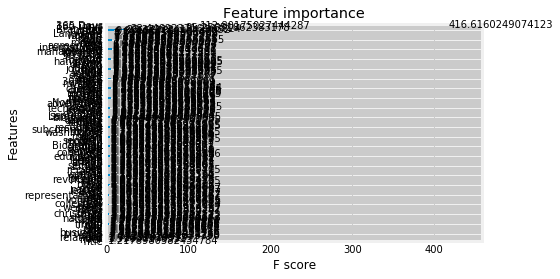

In [75]:
xgb.plot_importance(gbm, importance_type='gain')

### Logistic Regression

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [45]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
lr_model = LogisticRegression(C=10000)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_train_predict = lr_model.predict(X_train_scaled)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.6670065928900863
Train Recall:  0.6947951066701756
Train Precision:  0.6534865337474748
Train f1:  0.6735080154053786


In [48]:
X_val_scaled = std_scale.transform(X_val)
y_val_pred = lr_model.predict(X_val_scaled)
print("Accuracy: ",metrics.accuracy_score(y_val, y_val_pred))
print("Precision: ",metrics.precision_score(y_val, y_val_pred))
print("Recall: ",metrics.recall_score(y_val, y_val_pred))
print("F1: ",metrics.f1_score(y_val, y_val_pred))

Accuracy:  0.6662973687523606
Precision:  0.652136629984279
Recall:  0.6969959266802443
F1:  0.6738204818980581


In [49]:
confusion_matrix(y_val, y_val_pred)

array([[25546, 14604],
       [11902, 27378]])

Logistic vs XGBoost Conclusion. The Performance of XGBoost was notably better